## This Lab was done by: ELOUAADI Mehdi 114871


In [8]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.io import imread
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [24]:
tf.keras.backend.set_image_data_format('channels_last')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train = x_train / 255.
x_test = x_test / 255.

# Define the labels for the binary classification
def convert_to_binary_class(y):
    # Classes 0 (airplane) and 2 (bird) can fly, all others cannot
    return np.where(np.isin(y, [0, 2]), 1, 0)

y_train_binary = convert_to_binary_class(y_train)
y_test_binary = convert_to_binary_class(y_test)

print(x_train.shape, y_train_binary.shape, x_test.shape, y_test_binary.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Images of objects that can fly:


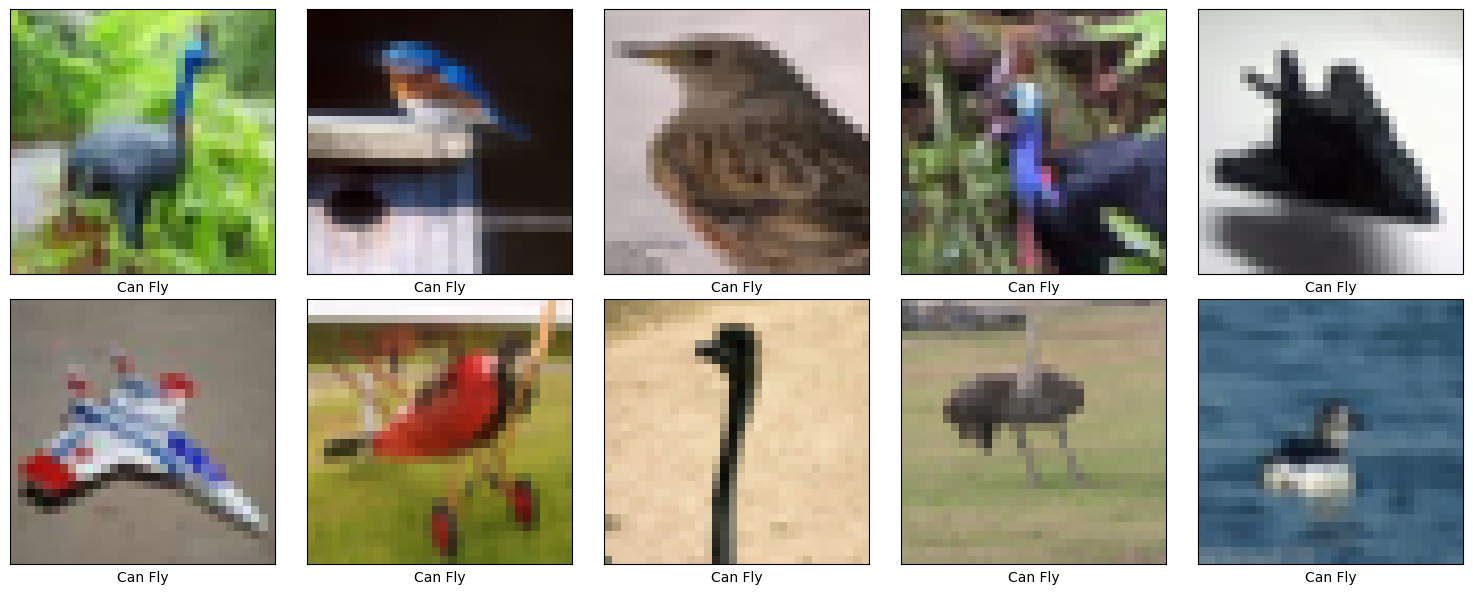

Images of objects that cannot fly:


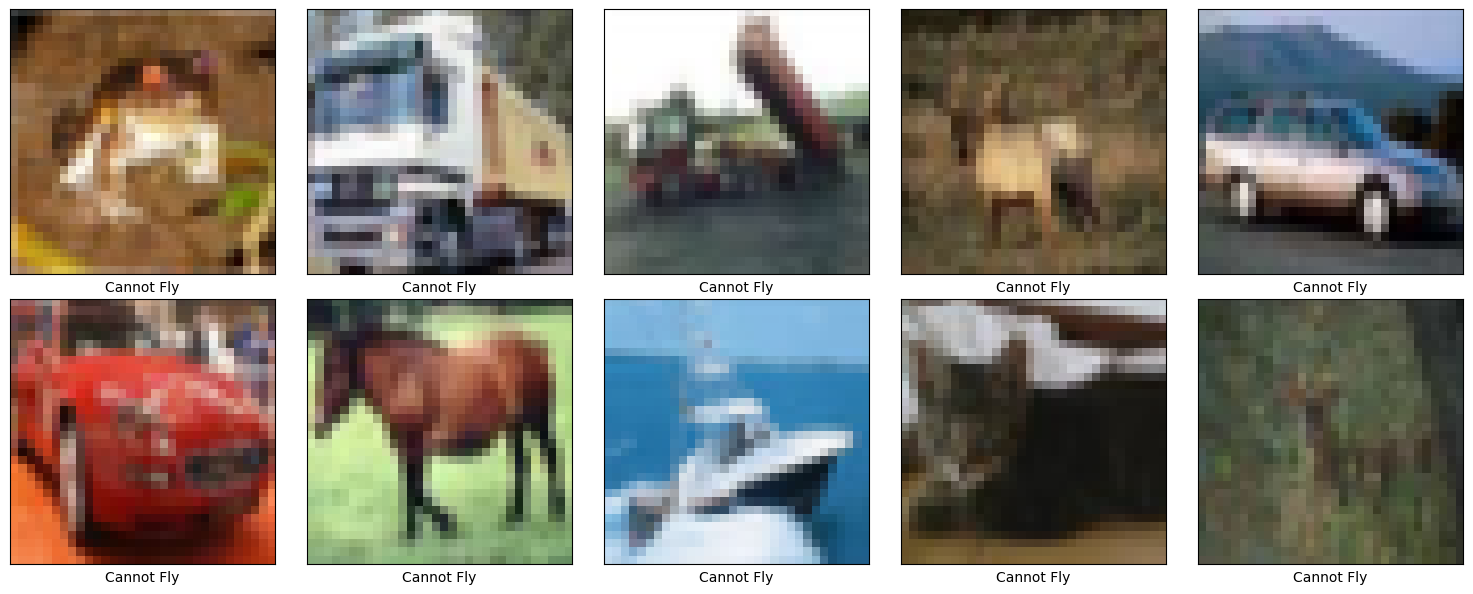

In [25]:
def plot_images_by_category(images, labels, binary_labels, category, num_rows=2, num_cols=5):
    plt.figure(figsize=(15, 6))
    indices = np.where(binary_labels == category)[0]
    for i in range(min(num_rows * num_cols, len(indices))):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[indices[i]], interpolation='nearest')
        plt.xlabel('Can Fly' if category == 1 else 'Cannot Fly')
    plt.tight_layout()
    plt.show()

# Plot images for the 'can fly' category
print("Images of objects that can fly:")
plot_images_by_category(x_train, y_train, y_train_binary, category=1)

# Plot images for the 'cannot fly' category
print("Images of objects that cannot fly:")
plot_images_by_category(x_train, y_train, y_train_binary, category=0)

In [29]:
# Fit a CNN having the following architecture:

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=x_train[0].shape),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(32, kernel_size=(3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.005),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 activation_25 (Activation)  (None, 30, 30, 16)        0         
                                                                 
 batch_normalization_20 (Ba  (None, 30, 30, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 15, 15, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 15, 15, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 32)       

In [30]:
history = model.fit(x_train, y_train_binary, epochs=100, batch_size=32, validation_split=0.15)

Epoch 1/100
1329/1329 [==============================] - 16s 10ms/step - loss: 0.4537 - accuracy: 0.8064 - val_loss: 0.3834 - val_accuracy: 0.8368
Epoch 2/100
1329/1329 [==============================] - 11s 9ms/step - loss: 0.4025 - accuracy: 0.8290 - val_loss: 0.3667 - val_accuracy: 0.8515
Epoch 3/100
1329/1329 [==============================] - 13s 10ms/step - loss: 0.3837 - accuracy: 0.8390 - val_loss: 0.3762 - val_accuracy: 0.8520
Epoch 4/100
1329/1329 [==============================] - 12s 9ms/step - loss: 0.3659 - accuracy: 0.8480 - val_loss: 0.3530 - val_accuracy: 0.8549
Epoch 5/100
1329/1329 [==============================] - 11s 8ms/step - loss: 0.3546 - accuracy: 0.8526 - val_loss: 0.4070 - val_accuracy: 0.8329
Epoch 6/100
1329/1329 [==============================] - 12s 9ms/step - loss: 0.3487 - accuracy: 0.8561 - val_loss: 0.3101 - val_accuracy: 0.8761
Epoch 7/100
1329/1329 [==============================] - 11s 8ms/step - loss: 0.3410 - accuracy: 0.8602 - val_loss: 0.3727

313/313 [==============================] - 2s 5ms/step
Accuracy: 0.8989
Precision: 0.8978
Recall: 0.5580
F1 Score: 0.6883
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8000
           1       0.90      0.56      0.69      2000

    accuracy                           0.90     10000
   macro avg       0.90      0.77      0.81     10000
weighted avg       0.90      0.90      0.89     10000



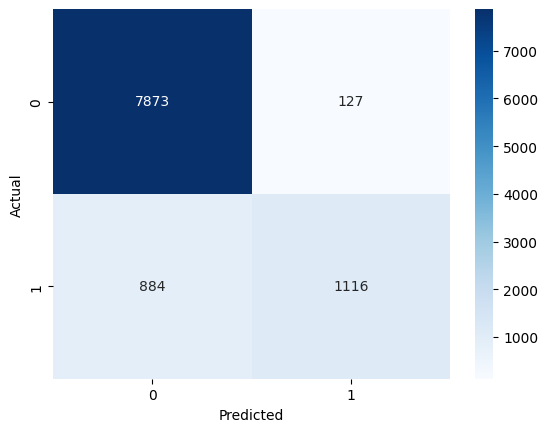

In [31]:
# Make predictions on the test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_binary, y_pred)
precision = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
f1 = f1_score(y_test_binary, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print classification report
print(classification_report(y_test_binary, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()